1. Install Extensions

In [12]:
!pip install kaggle



In [13]:
!pip install pandas numpy scikit-learn matplotlib seaborn


2. Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!mkdir -p ~/.kaggle


In [7]:
! cp /content/sample_data/kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets list

ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                              63KB  2025-03-07 05:44:03           5456         76  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                               20KB  2025-02-18 06:50:24          12359        220  1.0              
atharvasoundankar/global-music-streaming-trends-and-listener-insights  Global Music Streaming Trends & Listener Insights    95KB  2025-03-09 05:12:00           1000         23  1.0              
salahuddinahmedshuvo/ecom

In [11]:
! kaggle datasets download iamsouravbanerjee/house-rent-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset
License(s): other
house-rent-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
! unzip house-rent-prediction-dataset

Archive:  house-rent-prediction-dataset.zip
  inflating: Dataset Glossary.txt    
  inflating: House_Rent_Dataset.csv  


3. Program

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')
Mean Absolute Error: 26191.95793986809
Mean Squared Error: 2554775777.0452137
R² Score: 0.35896327760744784


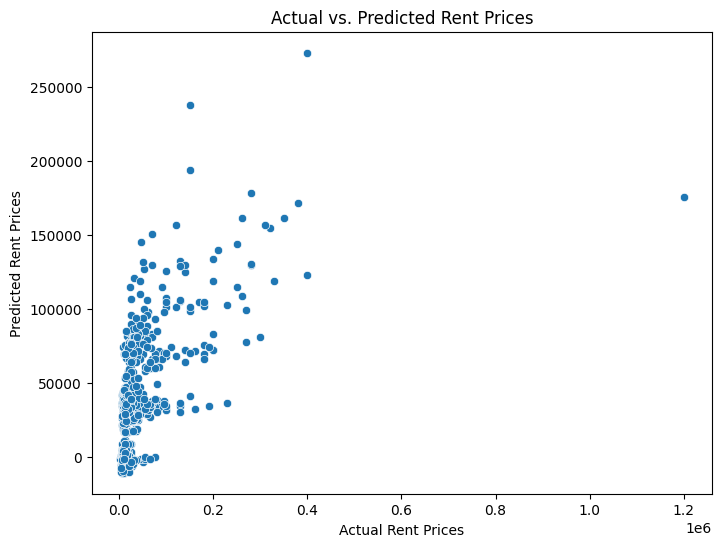

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset from local path or Colab
url = "/content/House_Rent_Dataset.csv"  # Ensure this path is correct

df = pd.read_csv(url)  # Load the dataset

# Display dataset columns to check feature names
print(df.columns)

# Select relevant features (modify based on dataset structure)
features = ["Size", "BHK", "Bathroom"]  # Adjust as per actual column names
target = "Rent"  # Adjust based on actual target column

# Drop missing values
df = df[features + [target]].dropna()

# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")
plt.title("Actual vs. Predicted Rent Prices")
plt.show()

